## import pseudo.py

In [21]:
from  pseudo import *

## Enter data
Enter the data path in Analysis_LC.

In [22]:
path_csv='/Users/gimhyeon/code/Jeff_class/4FGL_J1048.4+7143_weekly_2023. 11. 21..csv'
my_LC=Analysis_LC(path_csv)

## fit PDF
If you want to find the PSD of the original data, you can run fit_PDF().


If you want to get a PDF of other data (ex simulation data), you can run it with fit_PDF(flux=your_flux, origin_data=False).

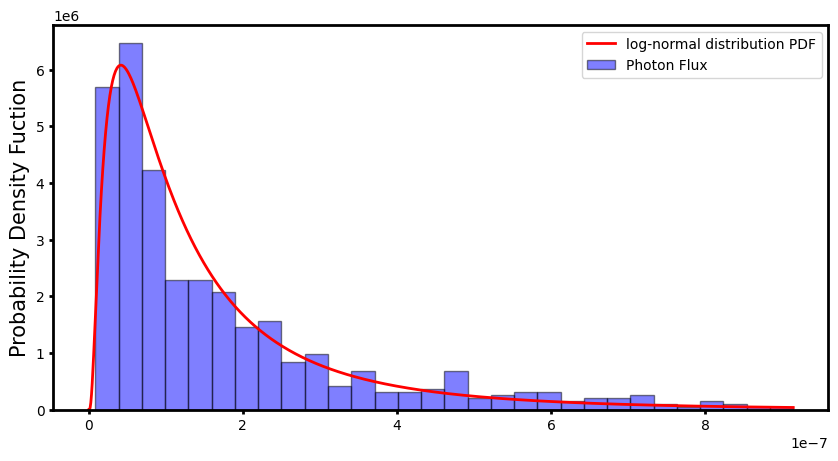

(array([0.00000000e+00, 9.14914915e-10, 1.82982983e-09, 2.74474474e-09,
        3.65965966e-09, 4.57457457e-09, 5.48948949e-09, 6.40440440e-09,
        7.31931932e-09, 8.23423423e-09, 9.14914915e-09, 1.00640641e-08,
        1.09789790e-08, 1.18938939e-08, 1.28088088e-08, 1.37237237e-08,
        1.46386386e-08, 1.55535536e-08, 1.64684685e-08, 1.73833834e-08,
        1.82982983e-08, 1.92132132e-08, 2.01281281e-08, 2.10430430e-08,
        2.19579580e-08, 2.28728729e-08, 2.37877878e-08, 2.47027027e-08,
        2.56176176e-08, 2.65325325e-08, 2.74474474e-08, 2.83623624e-08,
        2.92772773e-08, 3.01921922e-08, 3.11071071e-08, 3.20220220e-08,
        3.29369369e-08, 3.38518519e-08, 3.47667668e-08, 3.56816817e-08,
        3.65965966e-08, 3.75115115e-08, 3.84264264e-08, 3.93413413e-08,
        4.02562563e-08, 4.11711712e-08, 4.20860861e-08, 4.30010010e-08,
        4.39159159e-08, 4.48308308e-08, 4.57457457e-08, 4.66606607e-08,
        4.75755756e-08, 4.84904905e-08, 4.94054054e-08, 5.032032

In [23]:
my_LC.fit_PDF()
my_LC.plot_PDF()

## fit PSD
If you want to find the PSD of the original data, you can operate fit_PSD(delt,binning).


If you want to get a PDF of other data (ex simulation data), you can run it with fit_PDF(delt,binning,time=your_time,flux=your_flux,model='your_model').



The basic model is 'SPL', which is Simple Power Law.
Other methods include 'CPL'(Curved Power Law) and 'BPL'(Broken Power Law).


The fitting method used ODR

[ -1.18540837 -13.06552871]


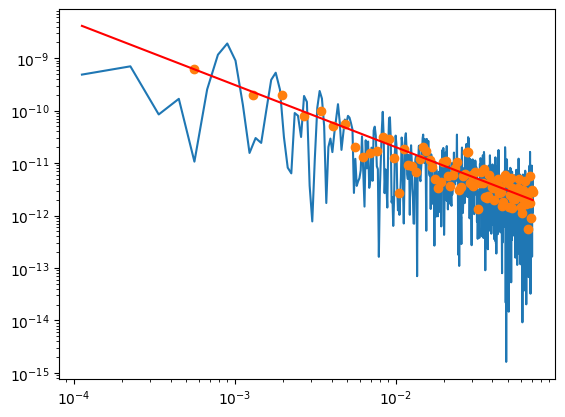

In [24]:
fit_params,fit_param_errors,chi_sq=my_LC.fit_PSD(delt=14,binning=100)
print(fit_params)
my_LC.plot_PSD()


## simulation Lightcurve.

If you want to make simulated data, you can run sim_LC().

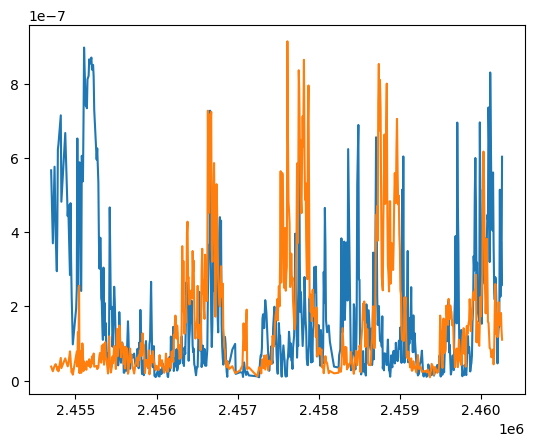

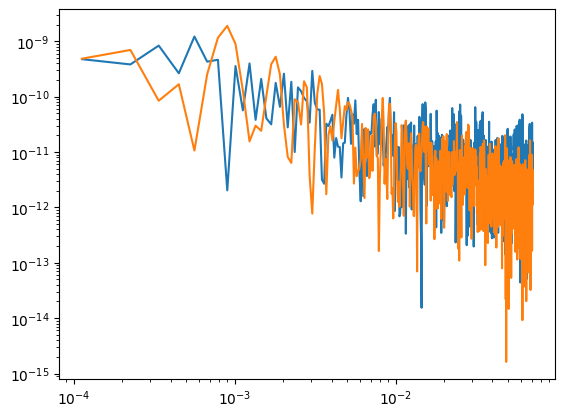

In [25]:
simulation_time,simulation_flux,simulation_freq,simulation_PSD=my_LC.sim_LC()
plt.plot(simulation_time,simulation_flux)
plt.plot(my_LC.time,my_LC.flux)
plt.show()
plt.loglog(simulation_freq,simulation_PSD)
plt.plot(my_LC.f,my_LC.DFJ)
plt.show()

## simulation Lightcurve.

If you want to make n times simulated data, you can run significance_calc(niters=n_times).

In [26]:
n=1000
simulation_time,all_flux,simulation_freq,all_PSD=my_LC.significance_calc(niters=n)

## Sigma calculation

The sigma calculation of the light curve and the PSD can be obtained by calc_fit_sim().

In [27]:
sigma1,sigma2,sigma3, PSD_sigma1,PSD_sigma2,PSD_sigma3=my_LC.calc_fit_sim()

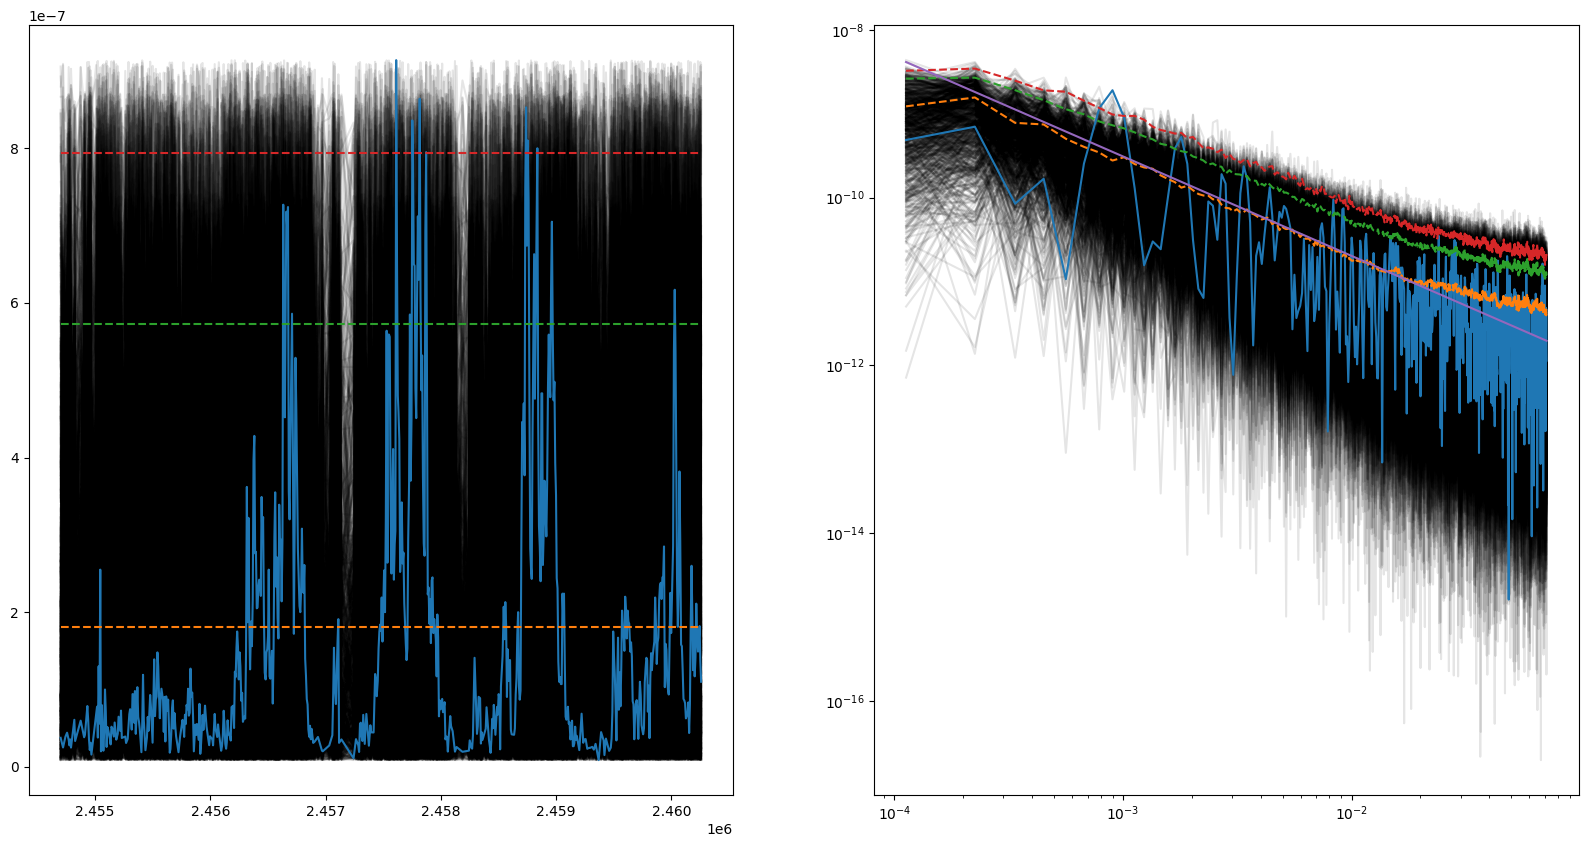

In [28]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(n):
    ax1.plot(simulation_time,all_flux[:,i],alpha=0.1,c='k')

    ax2.loglog(simulation_freq,all_PSD[:,i],alpha=0.1,c='k')

ax1.plot(my_LC.time,my_LC.flux)
ax1.plot([simulation_time[0],simulation_time[-1]],[sigma1,sigma1],linestyle='--')
ax1.plot([simulation_time[0],simulation_time[-1]],[sigma2,sigma2],linestyle='--')
ax1.plot([simulation_time[0],simulation_time[-1]],[sigma3,sigma3],linestyle='--')



ax2.plot(my_LC.f,my_LC.DFJ)
ax2.plot(simulation_freq,PSD_sigma1,linestyle='--')
ax2.plot(simulation_freq,PSD_sigma2,linestyle='--')
ax2.plot(simulation_freq,PSD_sigma3,linestyle='--')
ax2.loglog(simulation_freq,SPL(fit_params,simulation_freq))
plt.show()

## remove data

remove_below(threshold)


The data below is deleted by the threshold*the maximum flux.


remove_below(threshold,probability=1)


If you want to erase the data below probabilistically, you can set probability.




In [29]:
re_time,re_flux=my_LC.remove_below(0.1)

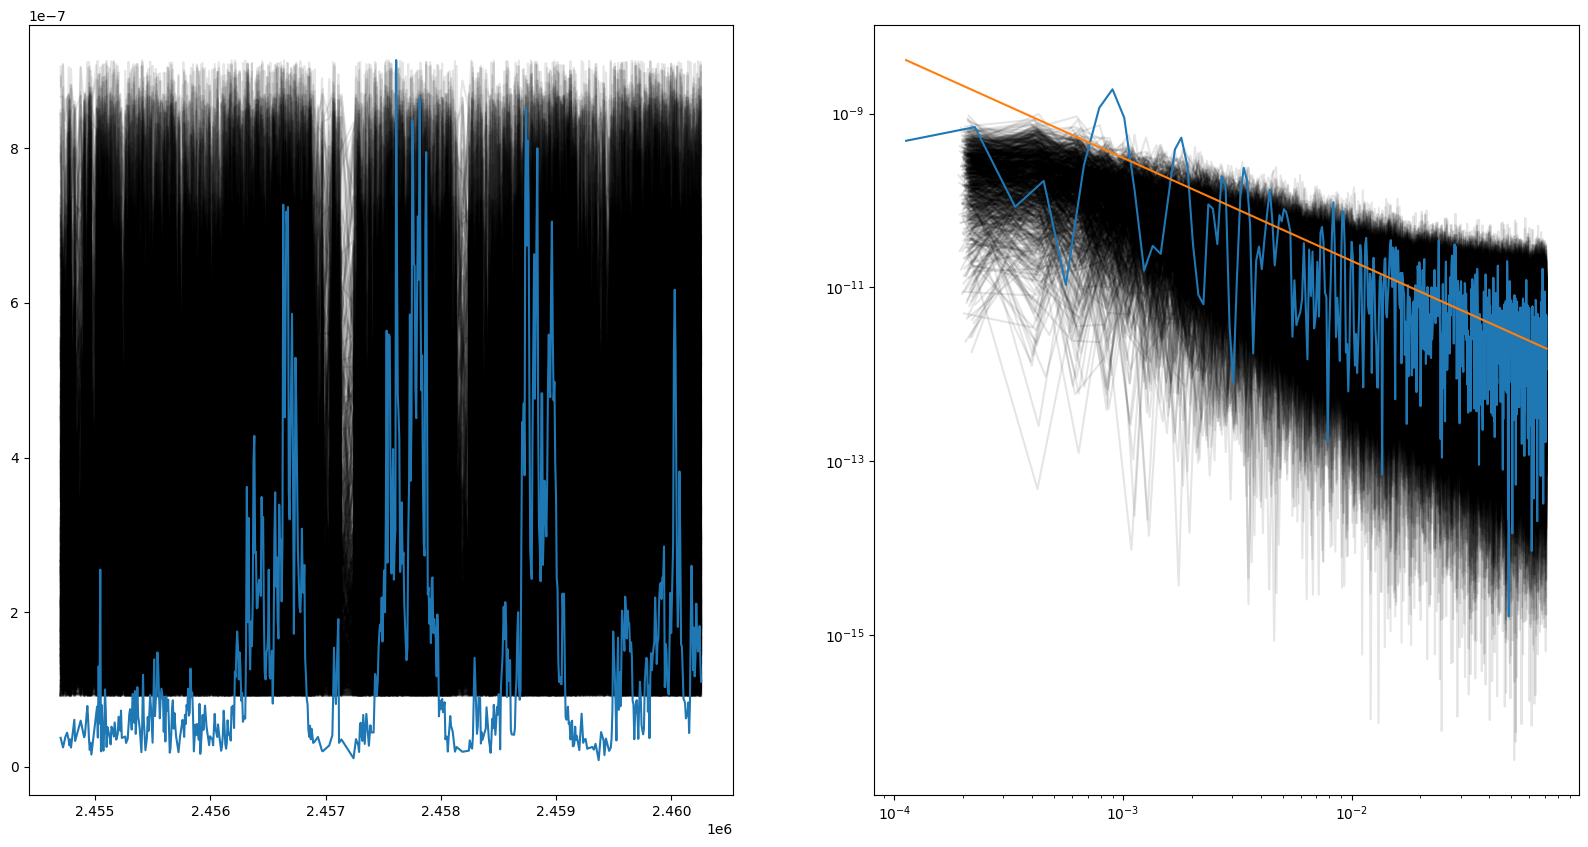

In [30]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(n):
    ax1.plot(re_time[:][i],re_flux[:][i],alpha=0.1,c='k')
    re_freq,re_PSD=my_LC.calc_PSD(delt=14,time=re_time[:][i],flux=re_flux[:][i],origin_data=False)
    
    ax2.loglog(re_freq,re_PSD,alpha=0.1,c='k')

ax1.plot(my_LC.time,my_LC.flux)
ax2.loglog(my_LC.f,my_LC.DFJ)
ax2.loglog(simulation_freq,SPL(fit_params,simulation_freq))
plt.show()

In [31]:
all_fit_params=np.zeros((n,2))

for i in range(n):
    fit_params,fit_param_errors,chi_sq=my_LC.fit_PSD(delt=14,binning=100,time=re_time[:][i],flux=re_flux[:][i],origin_data=False)
    all_fit_params[i]=(fit_params)



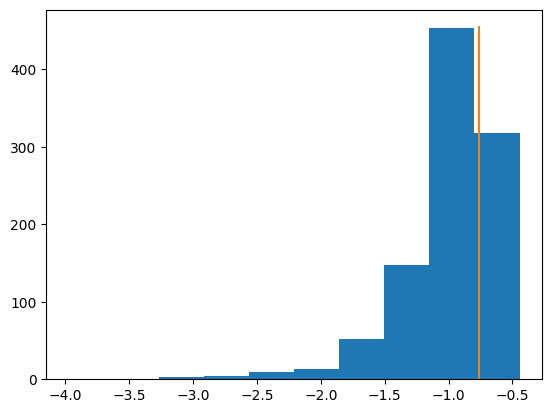

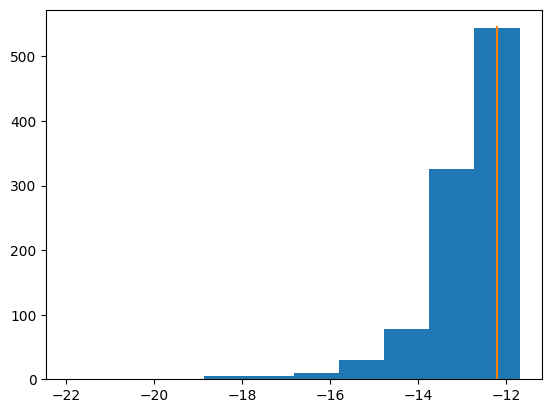

In [32]:
a=plt.hist(all_fit_params[:,0])
plt.plot([fit_params[0],fit_params[0]],[0,np.max(a[0]+1)])
plt.show()
a=plt.hist(all_fit_params[:,1])
plt.plot([fit_params[1],fit_params[1]],[0,np.max(a[0]+1)])
plt.show()

## interpolate data 

Data can also be interpolated.

The basic method is Type='linear', and the other methods are 'spline' and 'gauss'.

In [33]:
simulation_time,all_flux,simulation_freq,all_PSD=my_LC.interpolate()

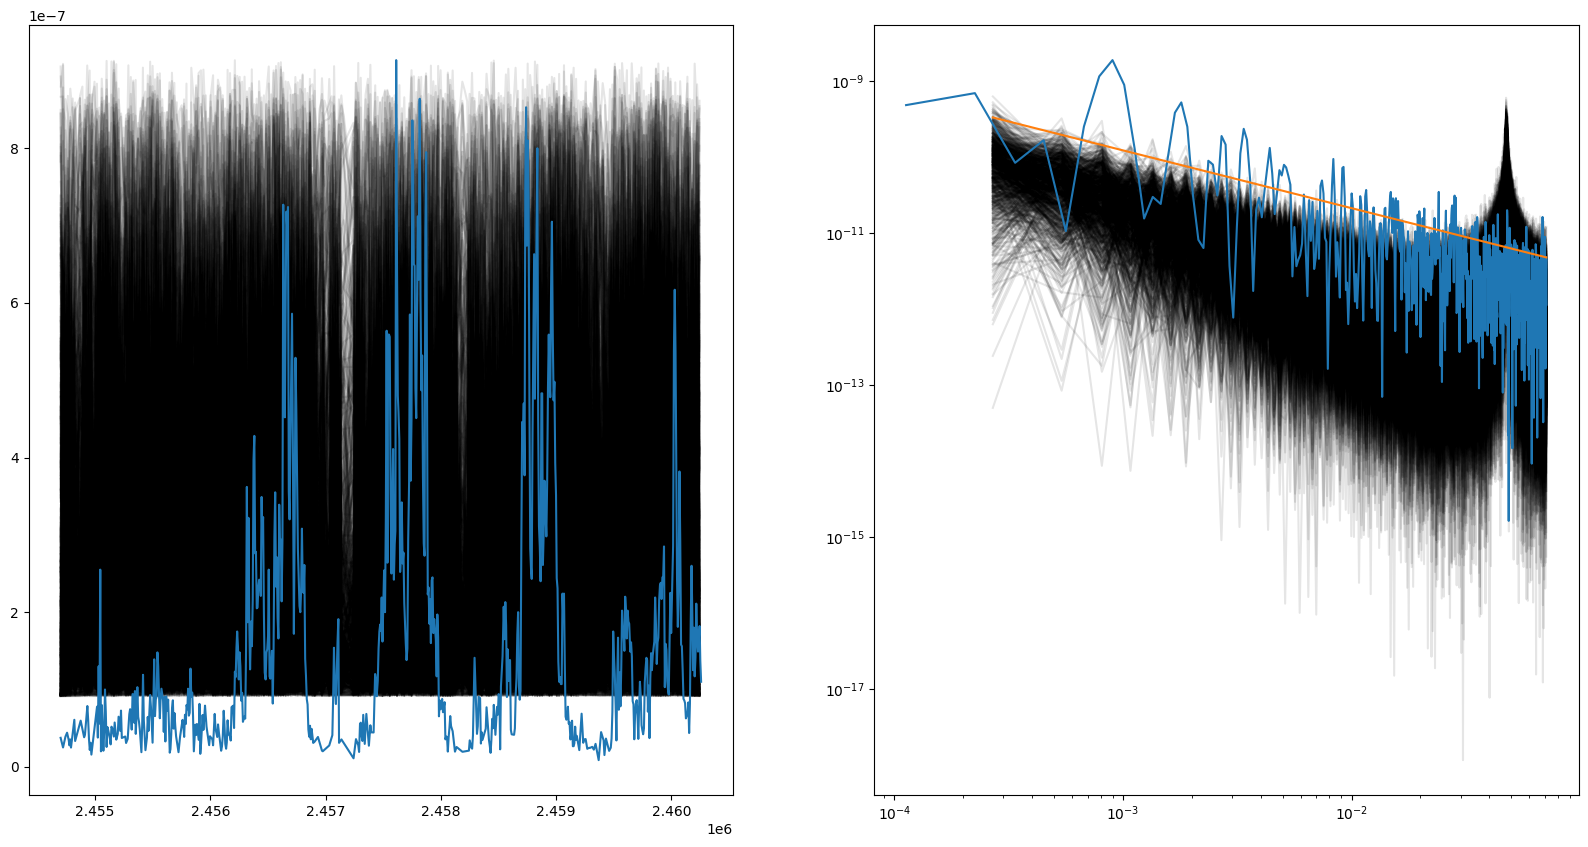

In [34]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(n):
    ax1.plot(simulation_time,all_flux[i],alpha=0.1,c='k')

    ax2.loglog(simulation_freq,all_PSD[i],alpha=0.1,c='k')

ax1.plot(my_LC.time,my_LC.flux)
ax2.loglog(my_LC.f,my_LC.DFJ)
ax2.loglog(simulation_freq,SPL(fit_params,simulation_freq))
plt.show()

In [35]:
all_fit_params=np.zeros((n,2))

for i in range(n):
    fit_params,fit_param_errors,chi_sq=my_LC.fit_PSD(delt=14,binning=100,time=simulation_time,flux=all_flux[i],origin_data=False)
    all_fit_params[i]=(fit_params)



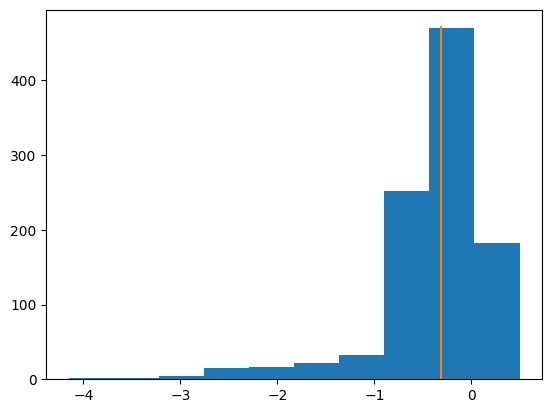

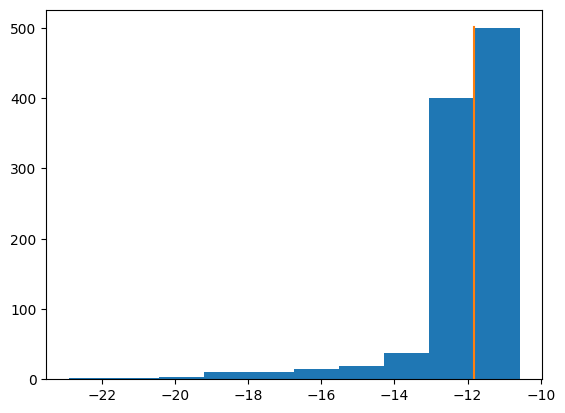

In [36]:
a=plt.hist(all_fit_params[:,0])
plt.plot([fit_params[0],fit_params[0]],[0,np.max(a[0]+1)])
plt.show()
a=plt.hist(all_fit_params[:,1])
plt.plot([fit_params[1],fit_params[1]],[0,np.max(a[0]+1)])
plt.show()